# Hypothesis 1:
Common weather variables have impact on amount of crimes.

Import packages.

In [10]:
import pandas as pd
import seaborn as sns
from scipy import stats

Read in original data of Boston crime.

In [11]:
df = pd.read_csv('data/boston_crime.csv')

D:\anacoda\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Formalize time data and clean blank values of data of Boston.
Output to csv.

In [12]:
df = df[['OFFENSE_CODE_GROUP','OCCURRED_ON_DATE','STREET']]
df['OCCURRED_ON_DATE']=df['OCCURRED_ON_DATE'].map(lambda x:x.split(' ')[0])
df.dropna(axis=0, how='any', inplace=True)
df.to_csv('prep_data/modified_boston_crime.csv', index = False)

Read in the csv and reshape the dataframe.

In [13]:
weather =  pd.read_csv('data/boston_weather.csv')
boston_crime = pd.read_csv('prep_data/modified_boston_crime.csv')

Build function for combining weather data and crime data by date.

In [14]:
def combine_weather(crime_data, weather_data):
    """
    return a dataframe combined by inputted two dataframes

    :param crime_data: a dataframe of crime data
    :param weather_data: a dataframe of weather data
    :return: a dataframe of crime data with daily weather
    """
    crime_data = crime_data.groupby(['OCCURRED_ON_DATE']).size().reset_index(name='crime_count')
    weather_data = weather_data.set_index('DATE')
    crime_data = crime_data.set_index('OCCURRED_ON_DATE')
    crime_with_weather = pd.concat([weather_data, crime_data], axis=1, join='inner')
    crime_with_weather = crime_with_weather.drop(columns = ['STATION','NAME'])
    return crime_with_weather

Build function for checking the normal distribution of combined data.

In [15]:
def check_distribution(crime_with_weather):
    """
    no return values, print test result of normal distribution

    :param crime_with_weather: a dataframe of crime data with daily weather
    :return: no return values
    """
    u1, u2, u3, u4 = crime_with_weather['PRCP'].mean(), crime_with_weather['SNOW'].mean(), crime_with_weather['TAVG'].mean(),\
              crime_with_weather['crime_count'].mean()
    s1, s2, s3, s4 = crime_with_weather['PRCP'].std(), crime_with_weather['SNOW'].std(), crime_with_weather['TAVG'].std(),\
                          crime_with_weather['crime_count'].std()
    print('normal distribution of rainfall:', stats.kstest(crime_with_weather['PRCP'], 'norm', (u1, s1)))
    print('normal distribution of snowfall:', stats.kstest(crime_with_weather['SNOW'], 'norm', (u2, s2)))
    print('normal distribution of average temperature:', stats.kstest(crime_with_weather['TAVG'], 'norm', (u3, s3)))
    print('normal distribution of crime amount:', stats.kstest(crime_with_weather['crime_count'], 'norm', (u4, s4)))

Check the normal distribution.

In [16]:
boston_crime_with_weather = combine_weather(boston_crime, weather)
check_distribution(boston_crime_with_weather)

normal distribution of rainfall: KstestResult(statistic=0.345219839099404, pvalue=9.842111074551578e-168)
normal distribution of snowfall: KstestResult(statistic=0.5024198169740333, pvalue=0.0)
normal distribution of average temperature: KstestResult(statistic=0.08904051467817176, pvalue=2.7486129893276003e-11)
normal distribution of crime amount: KstestResult(statistic=0.03909446762282237, pvalue=0.01598601872657872)


Create scatter plot for a quick check.

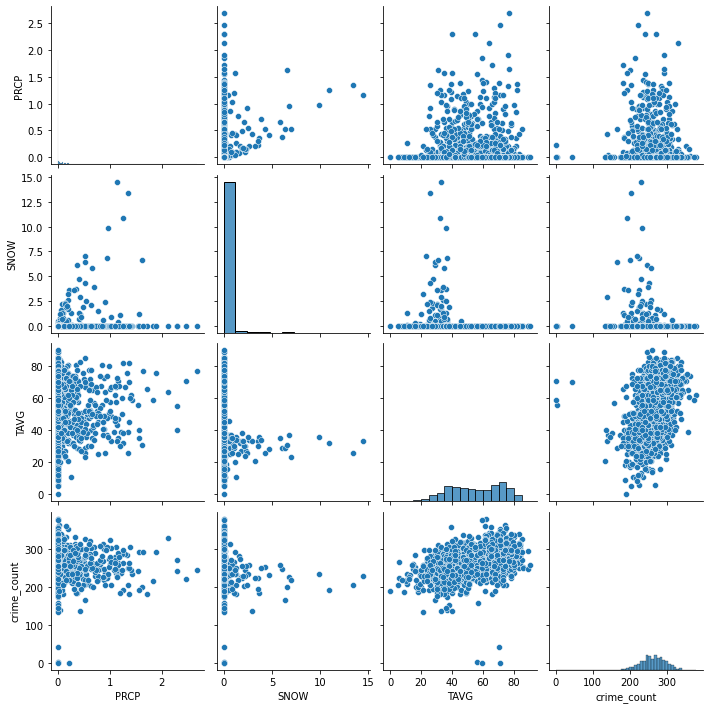

In [17]:
sns.pairplot(boston_crime_with_weather)

Linear correlation only exists between crime amount and average temperature?
Use Spearman for calculating related coefficient.

In [18]:
boston_crime_with_weather.corr(method='spearman')

,PRCP,SNOW,TAVG,crime_count
PRCP,1.000000,0.285304,-0.044631,-0.096889
SNOW,0.285304,1.000000,-0.318783,-0.207613
TAVG,-0.044631,-0.318783,1.000000,0.449838
crime_count,-0.096889,-0.207613,0.449838,1.000000


Common weather variables have little impact on amount of crimes.